# Does your classifier work?

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from numpy.random import choice
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

In [2]:
target_names = {0:'setosa', 
1:'versicolor', 
2:'virginica'}

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Iris dataset classification

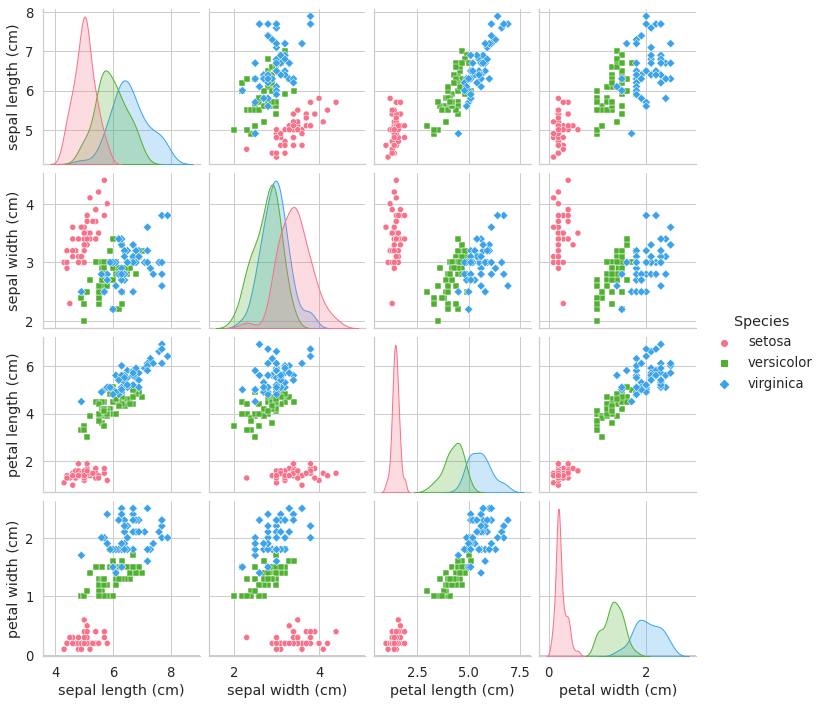

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y =  [target_names[k] for k in iris.target]  
df = pd.DataFrame(X, columns=iris.feature_names)
df["Species"] = y


sns.pairplot(df, hue="Species", palette="husl", markers=["o", "s", "D"])

In [5]:
pd.Series(y).value_counts()

virginica     50
setosa        50
versicolor    50
dtype: int64

## train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## train a knn classifier

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Q1) is the score trustable

we perform a permutation test on the labels. We randomly shuffle the labels and try to predict the label. If we see a significant drop on the accuracy, then it means that the classifier has learned the structure and it is not simply overfitting

In [9]:
accuracy_result = []

for _ in range(1_000_0):
    y_test_star = choice(y_test, len(y_test), replace = True)
    accuracy_star = knn.score(X_test, y_test_star)
    accuracy_result.append(accuracy_star)

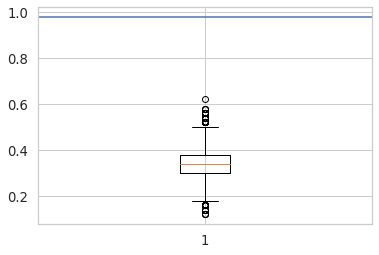

In [10]:
plt.boxplot(accuracy_result)
plt.hlines(0.98, 0.5, 1.5, "b")

## Q2) Which feature contributed the most for the prediction

we perform a permutation test on the features. We shuffle each feature and do the prediction. In case that the prediction accuracy drops, that means the feature is contributing to the prediction

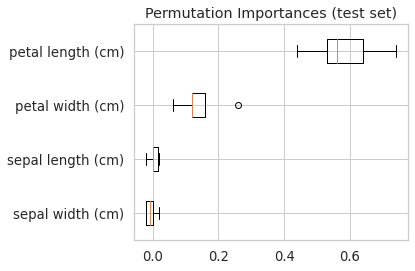

In [11]:
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(iris.feature_names)[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()